In [1]:
import gzip
import json
from pprint import pprint # Used for clean dictionary printing

# 1. Define the files to process
DATA_PATH = '/data/sukhanna/cse258/'
FILE_REVIEWS = "Kindle_Store.jsonl.gz"
FILE_METADATA = "meta_Kindle_Store.jsonl.gz"

def read_and_print_first_entry(filepath: str):
    """
    Opens a .jsonl.gz file in binary mode, reads and decodes the first line, 
    and parses it as a JSON object (dictionary).
    """
    print("-" * 60)
    print(f"Reading first entry from: {filepath}")
    
    try:
        # Use 'rb' (read binary) mode for compressed files
        with gzip.open(filepath, 'rb') as f:
            # Read the first line of the file (returns bytes)
            first_line_bytes = f.readline()
            
            if not first_line_bytes:
                print("Error: File is empty or cannot be read.")
                return

            # Decode the bytes to a standard string (using UTF-8)
            first_line_str = first_line_bytes.decode('utf-8').strip()
            
            # Parse the JSON string into a Python dictionary
            entry_dict = json.loads(first_line_str)
            
            pprint(entry_dict)
    except FileNotFoundError:
        print(f"Error: File not found at path: {filepath}")
    except Exception as e:
        print(f"An error occurred while processing {filepath}: {e}")

# --- Execution ---
read_and_print_first_entry(DATA_PATH + FILE_REVIEWS)
read_and_print_first_entry(DATA_PATH + FILE_METADATA)

------------------------------------------------------------
Reading first entry from: /data/sukhanna/cse258/Kindle_Store.jsonl.gz
{'asin': 'B00LXRJICK',
 'helpful_vote': 0,
 'images': [],
 'parent_asin': 'B00LXRJICK',
 'rating': 5.0,
 'text': 'GRUMLEY is on par with Clive Cussler and his Dirk Pitt series of '
         'novels.  His stories are well written and imaginative and I cannot '
         'wait for the next one.',
 'timestamp': 1427541413000,
 'title': 'excellent writer reminds me of Clive Cussler',
 'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ',
 'verified_purchase': False}
------------------------------------------------------------
Reading first entry from: /data/sukhanna/cse258/meta_Kindle_Store.jsonl.gz
{'author': {'about': ['A New York Times and USA Today Bestselling Author, '
                      'Penelope Sky is known for her dark romance that makes '
                      'you fall for her characters....no matter how dark they '
                      'seem. Her books are 

In [2]:
from typing import List, Optional

def get_entry_keys(filepath: str) -> Optional[List[str]]:
    """
    Opens a .jsonl.gz file, reads the first entry, and returns the list of its primary keys.
    Returns None if an error occurs or the file is empty.
    """
    try:
        # 'rb' mode for compressed files
        with gzip.open(filepath, 'rb') as f:
            first_line_bytes = f.readline()
            
            if not first_line_bytes:
                print(f"Warning: File {filepath} is empty.")
                return None
            
            # Decode to string and parse JSON
            first_line_str = first_line_bytes.decode('utf-8').strip()
            entry_dict = json.loads(first_line_str)
            
            return list(entry_dict.keys())
            
    except FileNotFoundError:
        print(f"Error: File not found at path: {filepath}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from the first line of {filepath}.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while processing {filepath}: {e}")
        return None

# --- Execution and Printing ---

print("## Fields in Review Data (Kindle_Store.jsonl.gz):")
review_keys = get_entry_keys(DATA_PATH + FILE_REVIEWS)
if review_keys:
    print(review_keys)

print("\n## Fields in Metadata (meta_Kindle_Store.jsonl.gz):")
meta_keys = get_entry_keys(DATA_PATH + FILE_METADATA)
if meta_keys:
    print(meta_keys)

## Fields in Review Data (Kindle_Store.jsonl.gz):
['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']

## Fields in Metadata (meta_Kindle_Store.jsonl.gz):
['main_category', 'title', 'subtitle', 'author', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together']


**Task 1** \
Round Up all the items and users into txt files

In [5]:
# import gzip
# import json
# from tqdm.notebook import tqdm

# # --- Configuration ---
# OUTPUT_USERS = "unique_users.txt"
# OUTPUT_ITEMS_META = "unique_items_metadata.txt"
# OUTPUT_ITEMS_REVIEWED = "unique_items_reviewed.txt"

# def extract_unique_ids():
#     """
#     Streams through files to collect unique IDs and writes them to .txt files.
#     """
    
#     # --- Sets to hold unique IDs (In-Memory) ---
#     unique_users = set()
#     unique_reviewed_items = set()
#     unique_metadata_items = set()
    
#     # ---------------------------------------------------------
#     # PASS 1: Process Reviews (Get Users and Reviewed Items)
#     # ---------------------------------------------------------
#     print(f"Processing {FILE_REVIEWS}...")
#     try:
#         with gzip.open(DATA_PATH + FILE_REVIEWS, 'rb') as f:
#             # We use tqdm to show a progress spinner (total unknown for stream)
#             for line in tqdm(f, desc="Reading Reviews"):
#                 try:
#                     data = json.loads(line.decode('utf-8').strip())
                    
#                     # Extract User ID
#                     if 'user_id' in data:
#                         unique_users.add(data['user_id'])
                        
#                     # Extract Item ID (Using parent_asin to match metadata)
#                     if 'parent_asin' in data:
#                         unique_reviewed_items.add(data['parent_asin'])
                        
#                 except (json.JSONDecodeError, KeyError):
#                     continue
#     except FileNotFoundError:
#         print(f"Error: {FILE_REVIEWS} not found.")
#         return

#     # ---------------------------------------------------------
#     # PASS 2: Process Metadata (Get All Available Items)
#     # ---------------------------------------------------------
#     print(f"\nProcessing {FILE_METADATA}...")
#     try:
#         with gzip.open(DATA_PATH + FILE_METADATA, 'rb') as f:
#             for line in tqdm(f, desc="Reading Metadata"):
#                 try:
#                     data = json.loads(line.decode('utf-8').strip())
                    
#                     # Extract Item ID
#                     if 'parent_asin' in data:
#                         unique_metadata_items.add(data['parent_asin'])
                        
#                 except (json.JSONDecodeError, KeyError):
#                     continue
#     except FileNotFoundError:
#         print(f"Error: {FILE_METADATA} not found.")
#         return

#     # ---------------------------------------------------------
#     # SAVE RESULTS
#     # ---------------------------------------------------------
#     print("\nSaving results to text files...")
    
#     def save_set_to_file(data_set, filename):
#         with open(filename, 'w') as f:
#             for item in data_set:
#                 f.write(f"{item}\n")
#         print(f"Saved {len(data_set)} unique entries to {filename}")

#     save_set_to_file(unique_users, DATA_PATH + OUTPUT_USERS)
#     save_set_to_file(unique_metadata_items, DATA_PATH + OUTPUT_ITEMS_META)
#     save_set_to_file(unique_reviewed_items, DATA_PATH + OUTPUT_ITEMS_REVIEWED)
    
#     print("\nExtraction Complete.")

# # --- Run the function ---
# extract_unique_ids()

In [4]:
# Output filenames from the previous step
PATH_USERS = "unique_users.txt"
PATH_ITEMS_META = "unique_items_metadata.txt"
PATH_ITEMS_REV = "unique_items_reviewed.txt"

def analyze_intersections():
    print("Loading ID lists...")
    
    # Helper to load file to set
    def load_ids(filepath):
        with open(filepath, 'r') as f:
            return set(line.strip() for line in f)

    users = load_ids(DATA_PATH + PATH_USERS)
    items_meta = load_ids(DATA_PATH + PATH_ITEMS_META)
    items_reviewed = load_ids(DATA_PATH + PATH_ITEMS_REV)
    
    # --- Computations ---
    n_users = len(users)
    n_meta = len(items_meta)
    n_rev = len(items_reviewed)
    
    # Intersection: Items that appear in BOTH lists
    valid_items = items_reviewed.intersection(items_meta)
    
    # Difference: Items in Reviews but NOT in Metadata
    ghost_items = items_reviewed - items_meta
    
    # Coverage Calculation
    coverage = (len(valid_items) / n_meta) * 100 if n_meta > 0 else 0
    
    # --- Reporting ---
    print(f"--- Dimension Stats ---")
    print(f"Unique Users (Rows):           {n_users:,}")
    print(f"Total Catalog Size (Cols):     {n_meta:,}")
    print(f"Items with Reviews:            {n_rev:,}")
    
    print(f"\n--- Intersection Health ---")
    print(f"Valid Items (Have Meta + Rev): {len(valid_items):,}")
    print(f"Ghost Items (No Metadata):     {len(ghost_items):,} ({(len(ghost_items)/n_rev)*100:.2f}% of reviewed items)")
    print(f"Catalog Coverage:              {coverage:.2f}% of catalog has interactions")
    
    print(f"\n--- Matrix Scale ---")
    print(f"Theoretical Matrix Size:       {n_users * len(valid_items):,} elements")

analyze_intersections()

Loading ID lists...
--- Dimension Stats ---
Unique Users (Rows):           5,646,991
Total Catalog Size (Cols):     1,591,371
Items with Reviews:            1,590,697

--- Intersection Health ---
Valid Items (Have Meta + Rev): 1,590,697
Ghost Items (No Metadata):     0 (0.00% of reviewed items)
Catalog Coverage:              99.96% of catalog has interactions

--- Matrix Scale ---
Theoretical Matrix Size:       8,982,651,642,727 elements


Streaming Kindle_Store.jsonl.gz for expanded analysis...


Processing Reviews: 0it [00:00, ?it/s]

Processed 25577616 lines. Found 25577616 valid temporal entries.


/tmp/ipykernel_2037897/1825358704.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(r_labels), y=list(r_values), ax=ax1, palette="viridis")


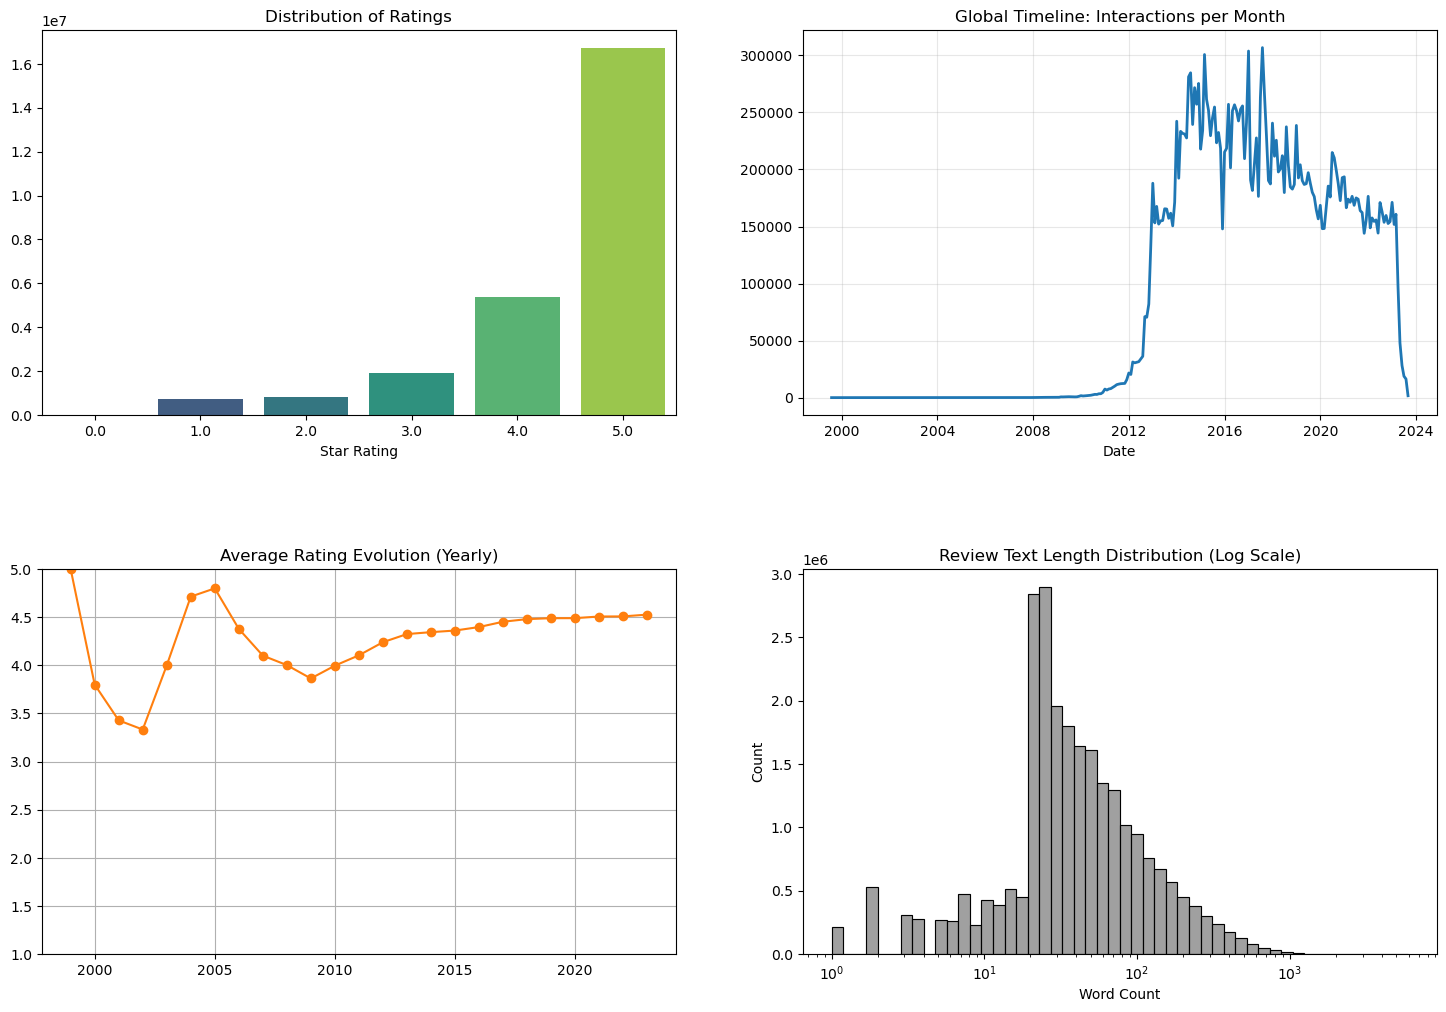

In [ ]:
# import gzip
# import json
# import datetime
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter, defaultdict
# from tqdm.notebook import tqdm

# # --- Configuration ---
# FILE_REVIEWS = "Kindle_Store.jsonl.gz"

# def run_final_eda():
#     # --- Aggregators ---
#     rating_counts = Counter()
#     monthly_activity = Counter()
#     year_rating_sum = defaultdict(float)
#     year_rating_count = defaultdict(int)
#     review_lengths = [] 
    
#     print(f"Streaming {FILE_REVIEWS} for expanded analysis...")
    
#     lines_read = 0
#     valid_entries = 0
    
#     try:
#         with gzip.open(DATA_PATH + FILE_REVIEWS, 'rb') as f:
#             for line in tqdm(f, desc="Processing Reviews"):
#                 lines_read += 1
#                 try:
#                     data = json.loads(line.decode('utf-8').strip())
                    
#                     # 1. Rating Analysis
#                     # Field is 'rating' based on your keys
#                     rating = data.get('rating')
#                     if rating is not None:
#                         rating = float(rating)
#                         rating_counts[rating] += 1
                        
#                     # 2. Temporal Analysis
#                     # Field is 'timestamp' (ms) based on your sample
#                     ts_raw = data.get('timestamp')
                        
#                     if ts_raw:
#                         # CRITICAL FIX: Convert ms to seconds
#                         ts_seconds = int(ts_raw) / 1000.0
#                         dt = datetime.datetime.fromtimestamp(ts_seconds)
                        
#                         month_key = dt.strftime('%Y-%m') 
#                         year_key = dt.year
                        
#                         monthly_activity[month_key] += 1
#                         valid_entries += 1
                        
#                         if rating is not None:
#                             year_rating_sum[year_key] += rating
#                             year_rating_count[year_key] += 1

#                     # 3. Text Length Analysis
#                     text = data.get('text', "")
#                     if text:
#                         review_lengths.append(len(text.split()))
                        
#                 except (ValueError, KeyError, OverflowError):
#                     continue
                    
#     except FileNotFoundError:
#         print(f"Error: File {FILE_REVIEWS} not found.")
#         return

#     print(f"Processed {lines_read} lines. Found {valid_entries} valid temporal entries.")
    
#     if valid_entries == 0:
#         print("Still no valid data found. Check field names again.")
#         return

#     # --- Data Prep ---
#     # Ratings
#     sorted_ratings = sorted(rating_counts.items())
#     if sorted_ratings:
#         r_labels, r_values = zip(*sorted_ratings)
#     else:
#         r_labels, r_values = [], []
    
#     # Temporal
#     sorted_months = sorted(monthly_activity.items())
#     dates, volumes = zip(*sorted_months)
#     date_objs = [datetime.datetime.strptime(d, '%Y-%m') for d in dates]
    
#     # Avg Rating
#     years = sorted(year_rating_count.keys())
#     avg_ratings = [year_rating_sum[y]/year_rating_count[y] for y in years]

#     # --- Visualization ---
#     fig = plt.figure(figsize=(18, 12))
#     plt.subplots_adjust(hspace=0.4)
    
#     # Plot 1: Rating Distribution
#     ax1 = fig.add_subplot(2, 2, 1)
#     if r_labels:
#         sns.barplot(x=list(r_labels), y=list(r_values), ax=ax1, palette="viridis")
#     ax1.set_title("Distribution of Ratings")
#     ax1.set_xlabel("Star Rating")
    
#     # Plot 2: Interaction Volume Over Time
#     ax2 = fig.add_subplot(2, 2, 2)
#     ax2.plot(date_objs, volumes, color='tab:blue', linewidth=2)
#     ax2.set_title("Global Timeline: Interactions per Month")
#     ax2.set_xlabel("Date")
#     ax2.grid(True, alpha=0.3)
    
#     # Plot 3: Average Rating Evolution
#     ax3 = fig.add_subplot(2, 2, 3)
#     if years:
#         ax3.plot(years, avg_ratings, marker='o', color='tab:orange')
#     ax3.set_title("Average Rating Evolution (Yearly)")
#     ax3.set_ylim(1, 5)
#     ax3.grid(True)

#     # Plot 4: Review Length Distribution
#     ax4 = fig.add_subplot(2, 2, 4)
#     if review_lengths:
#         sns.histplot(review_lengths, bins=50, log_scale=True, ax=ax4, color='gray')
#     ax4.set_title("Review Text Length Distribution (Log Scale)")
#     ax4.set_xlabel("Word Count")
    
#     plt.show()

# # --- Run ---
# run_final_eda()

**Review Data EDA**

In [6]:
import gzip
import json
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
# 1. Changed to standard text-based tqdm
from tqdm import tqdm 

# --- Global Presentation Settings ---
def set_presentation_style():
    """Sets high-quality plotting defaults for presentations."""
    sns.set_context("talk", font_scale=1.1)  # Bigger font for slides
    sns.set_style("whitegrid")               # Clean grid background
    plt.rcParams['figure.figsize'] = (12, 6) # Default 16:9 aspect ratio
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelsize'] = 14

set_presentation_style()

# --- Processing Function ---
def process_review_data(file_path):
    """
    Streams the file and aggregates statistics. 
    Returns raw data structures for plotting.
    """
    rating_counts = Counter()
    monthly_activity = Counter()
    year_rating_sum = defaultdict(float)
    year_rating_count = defaultdict(int)
    review_lengths = [] 
    
    print(f"Streaming {file_path}...")
    
    lines_read = 0
    valid_entries = 0
    
    try:
        with gzip.open(file_path, 'rb') as f:
            # 2. Standard tqdm (text widget)
            for line in tqdm(f, desc="Processing Rows", unit=" rows"):
                lines_read += 1
                try:
                    data = json.loads(line.decode('utf-8').strip())
                    
                    # --- Rating ---
                    rating = data.get('rating')
                    if rating is not None:
                        rating = float(rating)
                        rating_counts[rating] += 1
                        
                    # --- Temporal ---
                    ts_raw = data.get('timestamp')
                    if ts_raw:
                        # Handle Milliseconds
                        ts_val = float(ts_raw)
                        if ts_val > 100000000000:
                            ts_val = ts_val / 1000.0
                            
                        dt = datetime.datetime.fromtimestamp(ts_val)
                        month_key = dt.strftime('%Y-%m') 
                        year_key = dt.year
                        
                        monthly_activity[month_key] += 1
                        valid_entries += 1
                        
                        if rating is not None:
                            year_rating_sum[year_key] += rating
                            year_rating_count[year_key] += 1

                    # --- Text Length ---
                    text = data.get('text', "")
                    if text:
                        review_lengths.append(len(text.split()))
                        
                except (ValueError, KeyError, OverflowError):
                    continue
                    
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

    print(f"Done. Processed {lines_read} lines. Found {valid_entries} valid entries.")
    
    return {
        "rating_counts": rating_counts,
        "monthly_activity": monthly_activity,
        "year_sums": year_rating_sum,
        "year_counts": year_rating_count,
        "review_lengths": review_lengths
    }

# --- Execution ---
# Replace 'DATA_PATH + FILE_REVIEWS' with your actual path variable
results = process_review_data(DATA_PATH + FILE_REVIEWS)

Streaming /data/sukhanna/cse258/Kindle_Store.jsonl.gz...


Processing Rows: 25577616 rows [07:11, 59307.05 rows/s]

Done. Processed 25577616 lines. Found 25577616 valid entries.


/tmp/ipykernel_2091520/2307948808.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(labels), y=list(values), palette="viridis")


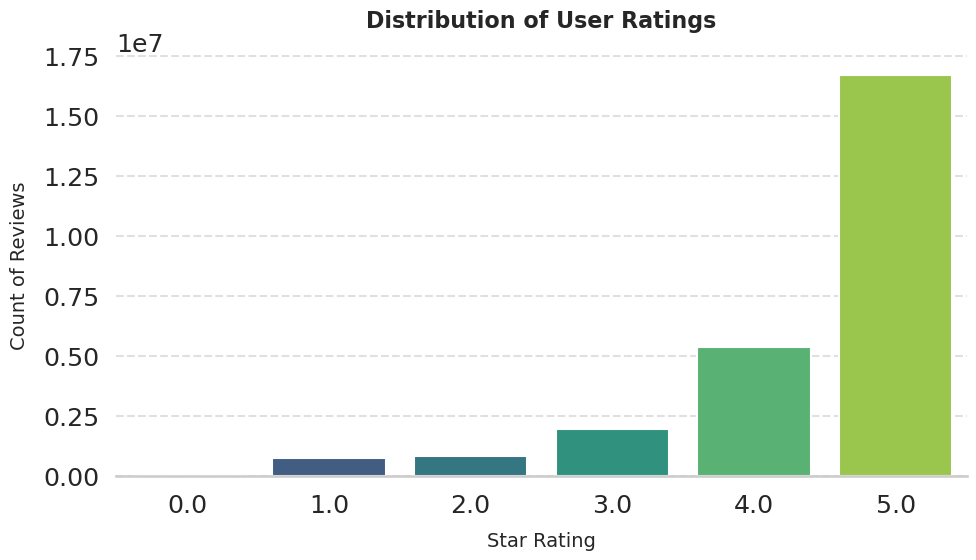

In [7]:
def plot_ratings_beautiful(rating_counts):
    # Data Prep
    sorted_ratings = sorted(rating_counts.items())
    if not sorted_ratings: return
    labels, values = zip(*sorted_ratings)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Using 'viridis' or 'magma' gives a premium look to ordinal data
    ax = sns.barplot(x=list(labels), y=list(values), palette="viridis")
    
    # Aesthetics
    ax.set_title("Distribution of User Ratings", pad=20)
    ax.set_xlabel("Star Rating", labelpad=10)
    ax.set_ylabel("Count of Reviews", labelpad=10)
    
    # Clean up borders
    sns.despine(left=True, bottom=False)
    
    # Add simple grid lines just on Y axis
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

plot_ratings_beautiful(results['rating_counts'])

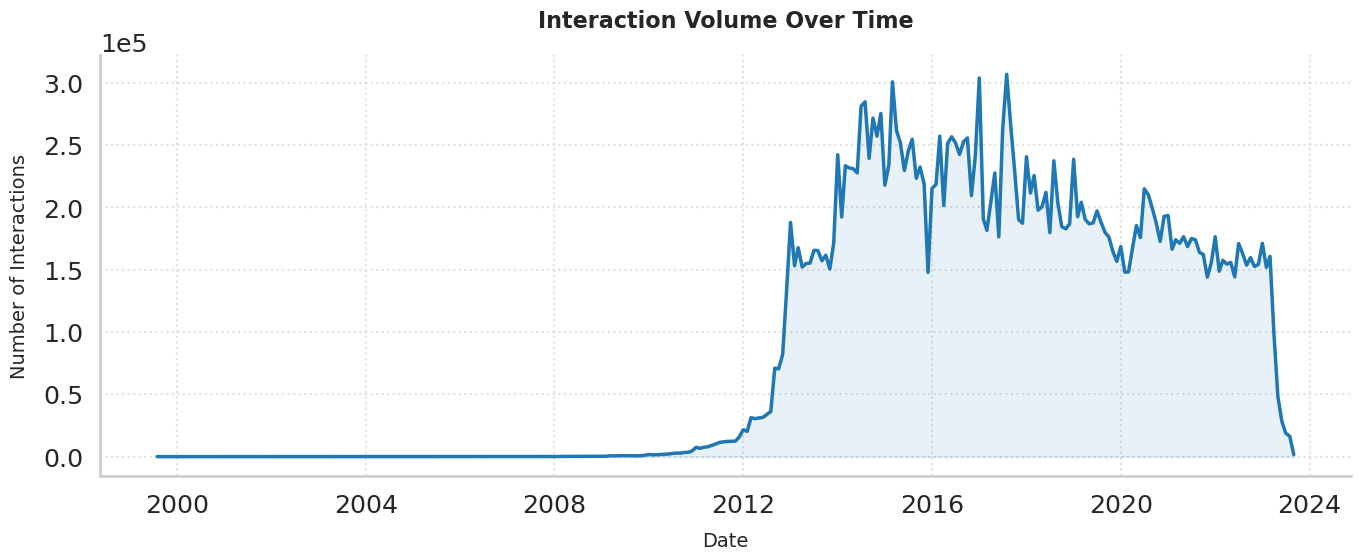

In [14]:
import matplotlib.ticker as ticker

def plot_timeline_beautiful(monthly_activity):
    # Data Prep
    sorted_months = sorted(monthly_activity.items())
    if not sorted_months: return
    dates_str, volumes = zip(*sorted_months)
    date_objs = [datetime.datetime.strptime(d, '%Y-%m') for d in dates_str]
    
    # Plotting
    plt.figure(figsize=(14, 6))
    
    # Solid distinct color line
    plt.plot(date_objs, volumes, color='#1f77b4', linewidth=2.5)
    plt.fill_between(date_objs, volumes, color='#1f77b4', alpha=0.1)
    
    # Aesthetics
    plt.title("Interaction Volume Over Time", pad=20)
    plt.xlabel("Date", labelpad=10)
    plt.ylabel("Number of Interactions", labelpad=10)
    
    # --- Scientific Notation Config ---
    ax = plt.gca() # Get Current Axis
    # style='sci' forces scientific notation
    # scilimits=(0,0) ensures it triggers even for smaller numbers (like 10^3)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
    # Remove top/right spines
    sns.despine()
    plt.grid(True, linestyle=':', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

plot_timeline_beautiful(results['monthly_activity'])

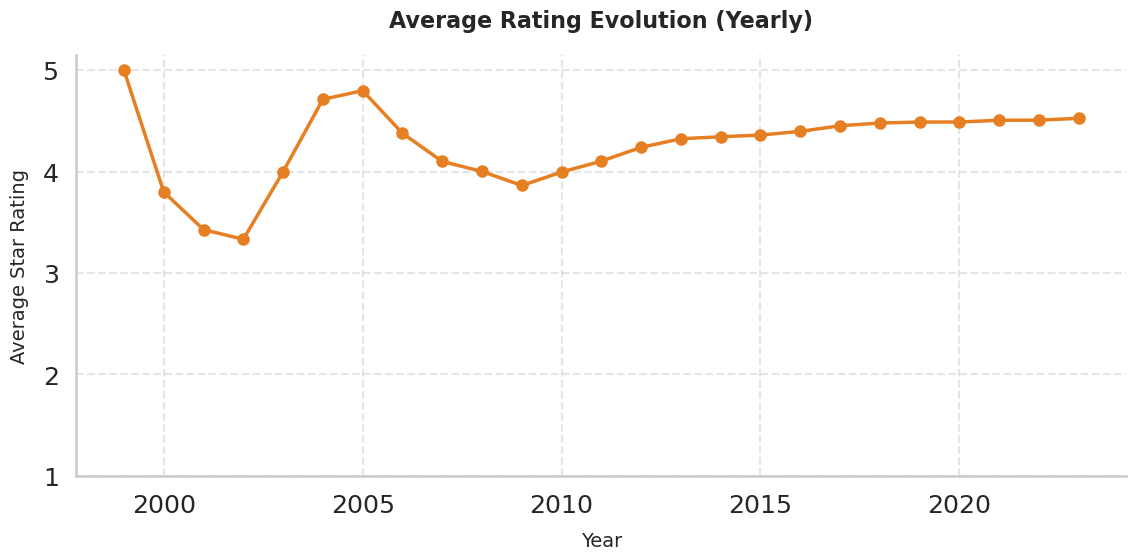

In [12]:
def plot_evolution_beautiful(year_sums, year_counts):
    # Data Prep
    years = sorted(year_counts.keys())
    if not years: return
    avg_ratings = [year_sums[y]/year_counts[y] for y in years]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Line plot with markers to highlight specific years
    plt.plot(years, avg_ratings, marker='o', markersize=8, 
             color='#e67e22', linewidth=2.5, linestyle='-')
    
    # Aesthetics
    plt.title("Average Rating Evolution (Yearly)", pad=20)
    plt.xlabel("Year", labelpad=10)
    plt.ylabel("Average Star Rating", labelpad=10)
    plt.ylim(1, 5.15) # Fix Y-axis to logical bounds
    
    sns.despine()
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()

plot_evolution_beautiful(results['year_sums'], results['year_counts'])

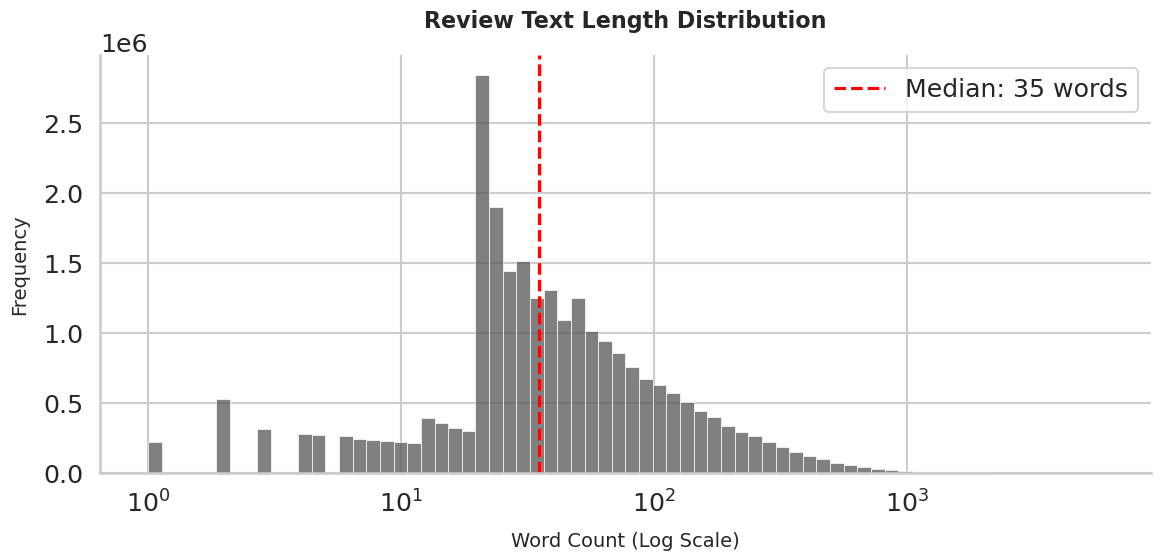

In [13]:
def plot_lengths_beautiful(review_lengths):
    if not review_lengths: return
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Histogram with log scale
    # Using a neutral gray color allows the shape to stand out
    sns.histplot(review_lengths, bins=70, log_scale=True, 
                 color="#555555", edgecolor="white", linewidth=0.5)
    
    # Aesthetics
    plt.title("Review Text Length Distribution", pad=20)
    plt.xlabel("Word Count (Log Scale)", labelpad=10)
    plt.ylabel("Frequency", labelpad=10)
    
    # Add a vertical line for the median
    median_len = np.median(review_lengths)
    plt.axvline(median_len, color='red', linestyle='--', label=f'Median: {int(median_len)} words')
    plt.legend()
    
    sns.despine()
    
    plt.tight_layout()
    plt.show()

plot_lengths_beautiful(results['review_lengths'])

In [15]:
# import gzip
# import json
# import datetime
# from tqdm.notebook import tqdm

# # --- Configuration ---
# INPUT_FILE = "Kindle_Store.jsonl.gz"
# OUTPUT_FILE = "filtered_Kindle_Store.jsonl.gz"

# # Thresholds
# CUTOFF_DATE = datetime.datetime(2013, 1, 1).timestamp() # 1356998400.0
# MIN_RATING = 4.0
# MIN_WORDS = 5

# def filter_dataset():
#     print(f"Starting Master Filter...")
#     print(f"Input:  {INPUT_FILE}")
#     print(f"Output: {OUTPUT_FILE}")
#     print("-" * 30)
#     print(f"Rules: Date >= 2013-01-01 | Rating >= 4.0 | Length >= 5 words")
#     print("-" * 30)

#     stats = {
#         "total_read": 0,
#         "kept": 0,
#         "dropped_date": 0,
#         "dropped_rating": 0,
#         "dropped_length": 0,
#         "errors": 0
#     }

#     try:
#         # Open both files: Read from Input, Write to Output (Compressed)
#         with gzip.open(DATA_PATH + INPUT_FILE, 'rb') as f_in, gzip.open(DATA_PATH + OUTPUT_FILE, 'wb') as f_out:
            
#             for line in tqdm(f_in, desc="Filtering Data"):
#                 stats["total_read"] += 1
                
#                 try:
#                     # 1. Parse Line
#                     line_str = line.decode('utf-8').strip()
#                     data = json.loads(line_str)
                    
#                     # 2. Extract Fields (Handle multiple potential keys)
#                     # Rating
#                     rating = data.get('overall') or data.get('rating')
#                     if rating is None: 
#                         stats["errors"] += 1; continue
#                     rating = float(rating)
                    
#                     # Timestamp
#                     ts_raw = data.get('unixReviewTime') or data.get('timestamp')
#                     if ts_raw is None:
#                         stats["errors"] += 1; continue
                    
#                     # Handle Milliseconds vs Seconds
#                     ts = float(ts_raw)
#                     if ts > 100000000000: # Heuristic for ms
#                         ts = ts / 1000.0
                        
#                     # Text
#                     text = data.get('reviewText') or data.get('text', "")
                    
#                     # 3. Apply Filters (Order matters for efficiency)
                    
#                     # Filter A: Date (The "Elbow")
#                     if ts < CUTOFF_DATE:
#                         stats["dropped_date"] += 1
#                         continue
                        
#                     # Filter B: Rating (Positivity Bias)
#                     if rating < MIN_RATING:
#                         stats["dropped_rating"] += 1
#                         continue
                        
#                     # Filter C: Text Length (Low signal)
#                     word_count = len(text.split())
#                     if word_count < MIN_WORDS:
#                         stats["dropped_length"] += 1
#                         continue
                        
#                     # 4. Success! Write the original line to the new file
#                     # We write the original bytes to ensure no data loss/re-formatting
#                     f_out.write(line)
#                     stats["kept"] += 1
                    
#                 except Exception:
#                     stats["errors"] += 1
#                     continue

#     except FileNotFoundError:
#         print(f"Error: {INPUT_FILE} not found.")
#         return

#     # --- Final Report ---
#     print("\n" + "="*30)
#     print("FILTERING COMPLETE")
#     print("="*30)
#     print(f"Total Rows Processed:   {stats['total_read']:,}")
#     print(f"Rows Kept (Saved):      {stats['kept']:,} ({stats['kept']/stats['total_read']:.1%} of original)")
#     print("-" * 30)
#     print(f"Dropped (Too Old):      {stats['dropped_date']:,}")
#     print(f"Dropped (Low Rating):   {stats['dropped_rating']:,}")
#     print(f"Dropped (Short Text):   {stats['dropped_length']:,}")
#     print(f"Data Errors:            {stats['errors']:,}")
#     print(f"\nNew file saved to: {OUTPUT_FILE}")

# # --- Run ---
# filter_dataset()

**Metadata EDA**

In [21]:
import gzip
import json
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# 1. Standard text-based tqdm
from tqdm import tqdm 

# --- Global Presentation Settings ---
def set_presentation_style():
    """Sets high-quality plotting defaults for presentations."""
    sns.set_context("talk", font_scale=1.1)
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelsize'] = 14

set_presentation_style()

# --- Helper ---
def parse_price_refactored(price_obj):
    if price_obj is None: return None
    if isinstance(price_obj, (float, int)): return float(price_obj)
    if isinstance(price_obj, str):
        clean = re.sub(r'[$,\s]', '', price_obj)
        try: return float(clean)
        except ValueError: return None
    return None

# --- Processing Function ---
def process_metadata(file_path):
    """
    Streams the file and aggregates statistics.
    Returns dictionary of raw data for plotting.
    """
    print(f"Streaming {file_path}...")
    
    category_counts = Counter()
    author_counts = Counter()
    prices = []
    desc_lengths = []
    
    total_items = 0
    has_description = 0
    
    try:
        with gzip.open(file_path, 'rb') as f:
            for line in tqdm(f, desc="Processing Items", unit=" items"):
                try:
                    data = json.loads(line.decode('utf-8').strip())
                    total_items += 1
                    
                    # --- 1. Taxonomy ---
                    cats = data.get('categories', [])
                    if isinstance(cats, list) and len(cats) > 0:
                        # Logic to find "Main" category (usually index 2)
                        if len(cats) >= 3: main_cat = cats[2]
                        else: main_cat = cats[-1]
                        
                        if main_cat not in ['Kindle Store', 'Kindle eBooks']:
                            category_counts[main_cat] += 1
                    
                    # --- 2. Author ---
                    auth_obj = data.get('author')
                    author_name = None
                    if isinstance(auth_obj, dict): author_name = auth_obj.get('name')
                    elif isinstance(auth_obj, str): author_name = auth_obj
                        
                    if author_name and author_name.lower() not in ['unknown', '']:
                        author_counts[author_name] += 1

                    # --- 3. Price ---
                    p_val = parse_price_refactored(data.get('price'))
                    if p_val is not None:
                        prices.append(p_val)
                            
                    # --- 4. Description ---
                    desc = data.get('description')
                    final_desc = ""
                    if isinstance(desc, list): final_desc = " ".join(desc)
                    elif isinstance(desc, str): final_desc = desc
                        
                    if final_desc.strip():
                        has_description += 1
                        desc_lengths.append(len(final_desc.split()))
                        
                except (json.JSONDecodeError, KeyError, AttributeError):
                    continue
                    
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return None

    print(f"Done. Processed {total_items:,} items.")
    print(f"Price Coverage: {(len(prices)/total_items)*100:.1f}%")
    print(f"Description Coverage: {(has_description/total_items)*100:.1f}%")

    return {
        "category_counts": category_counts,
        "author_counts": author_counts,
        "prices": prices,
        "desc_lengths": desc_lengths
    }

# --- Execution ---
# Replace with your actual path variable
meta_results = process_metadata(DATA_PATH + FILE_METADATA)

Streaming /data/sukhanna/cse258/meta_Kindle_Store.jsonl.gz...


Processing Items: 1591371 items [01:48, 14700.53 items/s]

Done. Processed 1,591,371 items.
Price Coverage: 85.4%
Description Coverage: 40.2%


/tmp/ipykernel_2091520/694447089.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(cat_vals), y=list(cat_names), palette="mako")


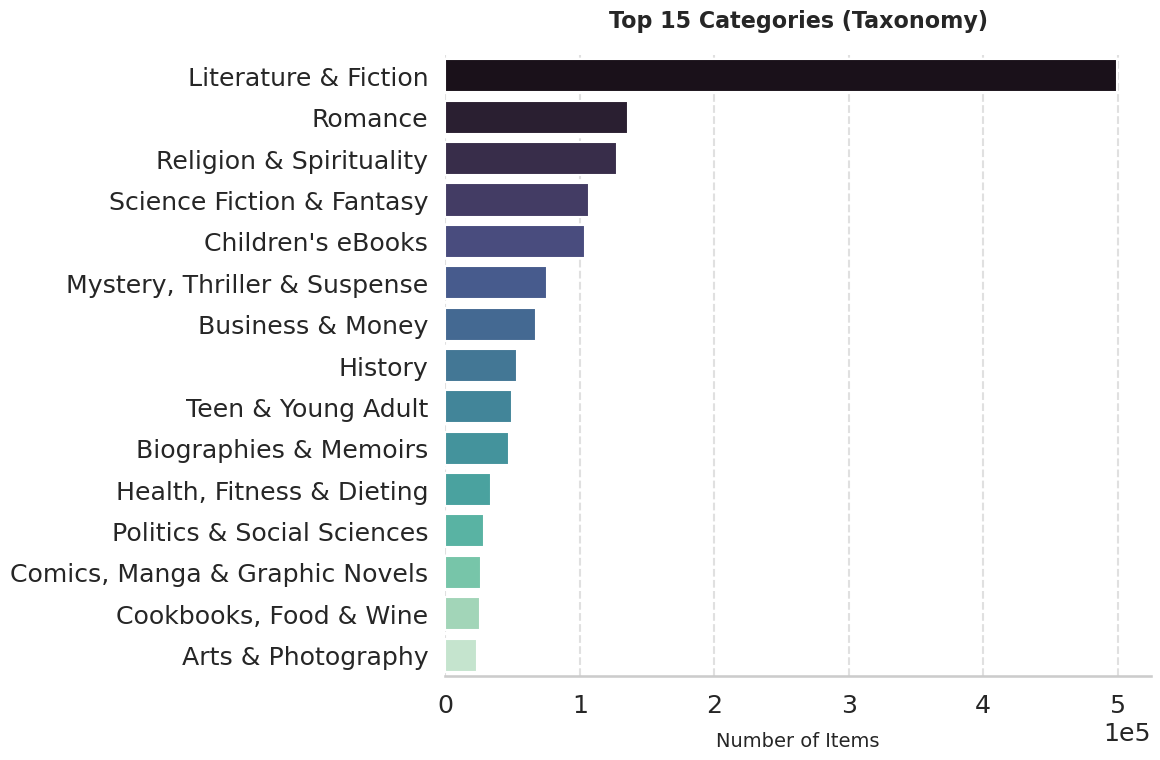

In [22]:
def plot_categories_beautiful(category_counts):
    # Data Prep
    top_cats = category_counts.most_common(15)
    if not top_cats: return
    cat_names, cat_vals = zip(*top_cats)
    
    # Plotting
    plt.figure(figsize=(12, 8)) # Taller for horizontal bars
    
    # 'mako' is a professional blue-green palette
    ax = sns.barplot(x=list(cat_vals), y=list(cat_names), palette="mako")
    
    # Aesthetics
    ax.set_title("Top 15 Categories (Taxonomy)", pad=20)
    ax.set_xlabel("Number of Items", labelpad=10)
    ax.set_ylabel("") # Categories are self-explanatory
    
    # Scientific notation for X-axis if numbers are huge
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
    
    sns.despine(left=True, bottom=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

plot_categories_beautiful(meta_results['category_counts'])

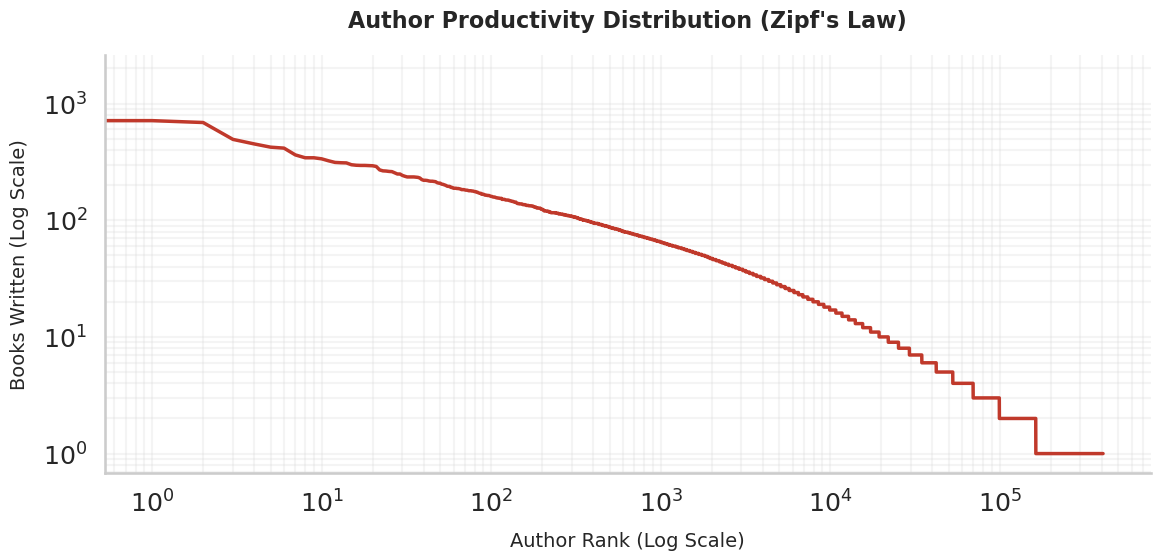

In [23]:
def plot_authors_beautiful(author_counts):
    # Data Prep
    author_vals = sorted(list(author_counts.values()), reverse=True)
    if not author_vals: return
    
    # Plotting
    plt.figure(figsize=(12, 6))
    
    # Thick line for visibility
    plt.loglog(author_vals, color='#c0392b', linewidth=2.5)
    
    # Aesthetics
    plt.title("Author Productivity Distribution (Zipf's Law)", pad=20)
    plt.xlabel("Author Rank (Log Scale)", labelpad=10)
    plt.ylabel("Books Written (Log Scale)", labelpad=10)
    
    sns.despine()
    # Log plots need specific grid settings
    plt.grid(True, which="both", ls="-", alpha=0.2)
    
    plt.tight_layout()
    plt.show()

plot_authors_beautiful(meta_results['author_counts'])

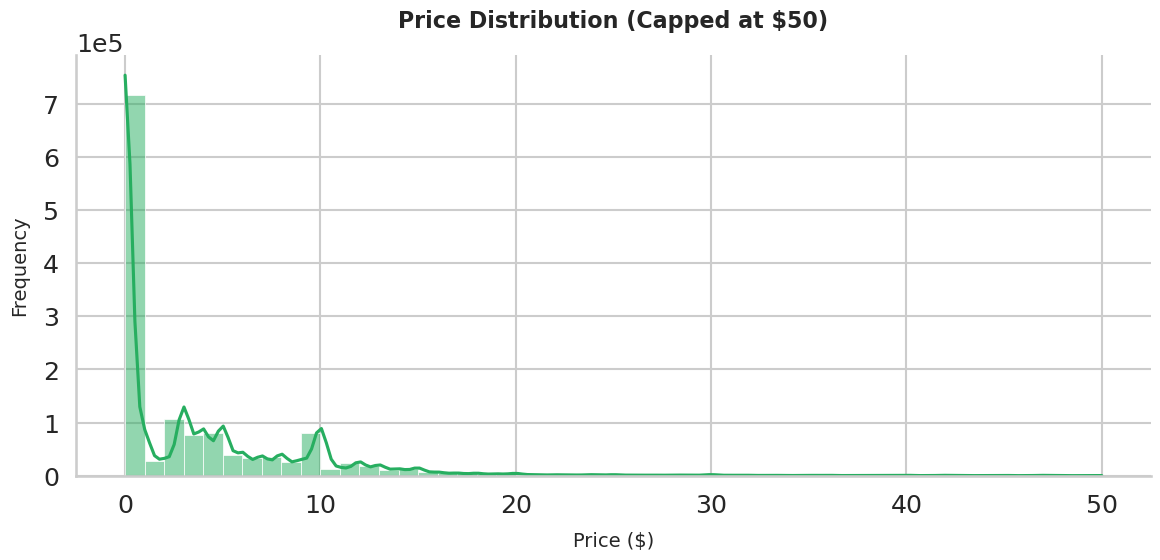

In [24]:
def plot_prices_beautiful(prices):
    if not prices: return
    
    # Filter outliers for the plot (keep focus on 99% of data)
    filtered_prices = [p for p in prices if p <= 50]
    
    plt.figure(figsize=(12, 6))
    
    # Hist with KDE
    sns.histplot(filtered_prices, bins=50, kde=True, 
                 color='#27ae60', edgecolor='white', linewidth=0.5)
    
    # Aesthetics
    plt.title("Price Distribution (Capped at $50)", pad=20)
    plt.xlabel("Price ($)", labelpad=10)
    plt.ylabel("Frequency", labelpad=10)
    
    # Scientific notation for Y-axis (counts)
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
    sns.despine()
    
    plt.tight_layout()
    plt.show()

plot_prices_beautiful(meta_results['prices'])

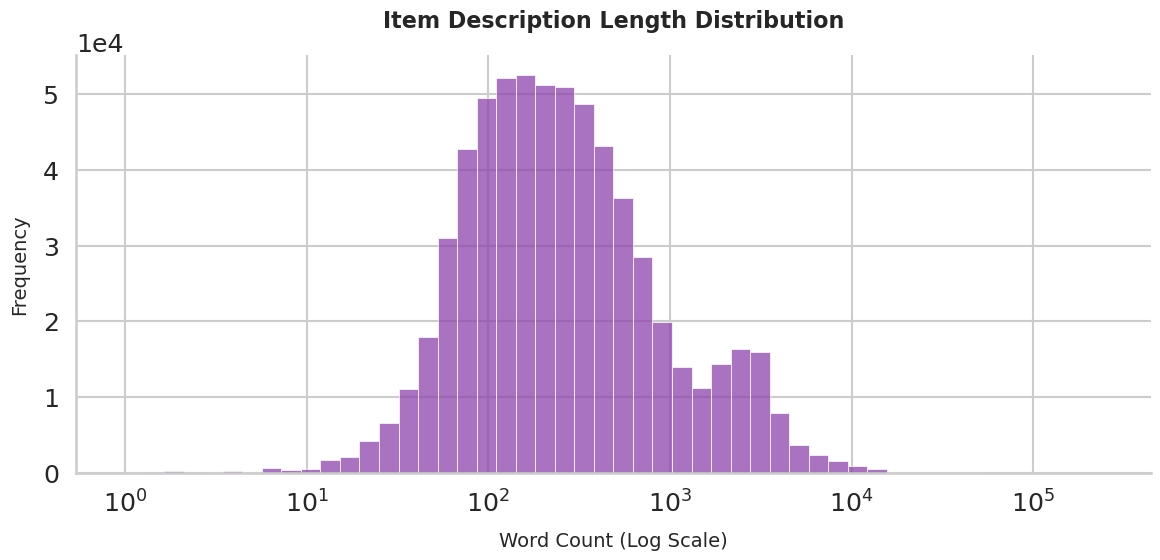

In [25]:
def plot_descriptions_beautiful(desc_lengths):
    if not desc_lengths: return
    
    plt.figure(figsize=(12, 6))
    
    # Log scale histogram
    sns.histplot(desc_lengths, bins=50, log_scale=True, 
                 color='#8e44ad', edgecolor='white', linewidth=0.5)
    
    # Aesthetics
    plt.title("Item Description Length Distribution", pad=20)
    plt.xlabel("Word Count (Log Scale)", labelpad=10)
    plt.ylabel("Frequency", labelpad=10)
    
    # Scientific notation for Y-axis
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
    sns.despine()
    
    plt.tight_layout()
    plt.show()

plot_descriptions_beautiful(meta_results['desc_lengths'])